In [1]:
# Markdown is not rendered in PyCharm.

# DeepBird

## Xeno Canto

This is a [website](https://www.xeno-canto.org) containing bird song recordings and classification. They have shared part of their [collection](https://www.gbif.org/dataset/b1047888-ae52-4179-9dd5-5448ea342a24) to [Global Biodiversity Information Facility](https://gbif.org)

### Terms of use

It is ok to download some files but we still need to contact for downloading the complete set. See the [terms](https://www.xeno-canto.org/about/terms)

## About this project

We want to learn the individual bird sound and try to learn their songs.

For this to happen we need to

- download the zip containing a csv from GBIF (if available)
- download samples with their annotations.
- process the samples into a spectrogram and extract regions of interest.
- learn the extracted regions

## Fetching

It seems the first item is `https://www.xeno-canto.org/1` and currently `https://www.xeno-canto.org/460846` the last.

As we have not contacted them yet we collect 5 samples each time we run this page.

In [2]:
import project;

# In case you want to have process data somewhere else change it
data_dir = project.get_project_dir() + 'data/'
project.set_data_dir(data_dir)

num_files = 5

project.print_stats()

In [3]:
import gbif

gbif.set_gbif_dir(project.get_gbif_dir())

gbif_id = '0025627-181108115102211'

In [4]:
gbif_csv = gbif.get_data()

Already downloaded zip 0025627-181108115102211


In [5]:
import pandas as pd

df = pd.read_csv(gbif_csv, sep='\t')

project.fix_gbif_df(df)

# Do we have data?
df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,XC_ID
0,1934871083,b1047888-ae52-4179-9dd5-5448ea342a24,http://data.biodiversitydata.nl/xeno-canto/obs...,Animalia,Chordata,Aves,Passeriformes,Parulidae,Seiurus,Seiurus aurocapilla,...,NaN,CC_BY_NC_4_0,Mike Nelson,Mike Nelson,NaN,NaN,2019-01-03T10:18:26.934Z,SOUND;STILLIMAGE,NaN,100119
1,1934871084,b1047888-ae52-4179-9dd5-5448ea342a24,http://data.biodiversitydata.nl/xeno-canto/obs...,Animalia,Chordata,Aves,Passeriformes,Turdidae,Catharus,Catharus guttatus,...,NaN,CC_BY_NC_4_0,Mike Nelson,Mike Nelson,NaN,NaN,2019-01-03T10:18:26.933Z,SOUND;STILLIMAGE,NaN,100113
2,1934871085,b1047888-ae52-4179-9dd5-5448ea342a24,http://data.biodiversitydata.nl/xeno-canto/obs...,Animalia,Chordata,Aves,Passeriformes,Parulidae,Setophaga,Setophaga ruticilla,...,NaN,CC_BY_NC_4_0,Mike Nelson,Mike Nelson,NaN,NaN,2019-01-03T10:18:26.936Z,SOUND;STILLIMAGE,NaN,100082
3,1934871086,b1047888-ae52-4179-9dd5-5448ea342a24,http://data.biodiversitydata.nl/xeno-canto/obs...,Animalia,Chordata,Aves,Passeriformes,Vireonidae,Vireo,Vireo gilvus,...,NaN,CC_BY_NC_4_0,Andrew Spencer,Andrew Spencer,NaN,NaN,2019-01-03T10:18:27.014Z,SOUND;STILLIMAGE,NaN,100053
4,1934871087,b1047888-ae52-4179-9dd5-5448ea342a24,http://data.biodiversitydata.nl/xeno-canto/obs...,Animalia,Chordata,Aves,Passeriformes,Icteridae,Dolichonyx,Dolichonyx oryzivorus,...,NaN,CC_BY_NC_4_0,Mike Nelson,Mike Nelson,NaN,NaN,2019-01-03T10:18:26.932Z,SOUND;STILLIMAGE,NaN,100089


In [6]:
# We have some classification of the birg
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170041 entries, 0 to 170040
Data columns (total 46 columns):
gbifID                           170041 non-null int64
datasetKey                       170041 non-null object
occurrenceID                     170041 non-null object
kingdom                          170041 non-null object
phylum                           168749 non-null object
class                            168749 non-null object
order                            168749 non-null object
family                           168749 non-null object
genus                            168749 non-null object
species                          168535 non-null object
infraspecificEpithet             39389 non-null object
taxonRank                        170041 non-null object
scientificName                   170041 non-null object
countryCode                      169447 non-null object
locality                         170040 non-null object
publishingOrgKey                 170041 non-null ob

In [7]:
# occurenceID references to http://data.biodiversitydata.nl/xeno-canto/observation/XC######
# fetching this resource redirects to the page and not the download link

df['occurrenceID'].head().map(lambda x: x.rsplit('/', 1)[1])

0    XC100119
1    XC100113
2    XC100082
3    XC100053
4    XC100089
Name: occurrenceID, dtype: object

In [8]:
df['XC_ID'].head()

0    100119
1    100113
2    100082
3    100053
4    100089
Name: XC_ID, dtype: object

In [9]:
import XenoCanto as xc
#import importlib; importlib.reload(XenoCanto)

xc.set_dir(project.get_sample_dir())

In [10]:
for id in df['XC_ID'].head(num_files):
    xc.convert_mp3_to_wav(id)

Already downloaded 100119 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100119.mp3
Already converted 100119 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100119.wav
Already downloaded 100113 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100113.mp3
Already converted 100113 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100113.wav
Already downloaded 100082 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100082.mp3
Already converted 100082 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100082.wav
Already downloaded 100053 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100053.mp3
Already converted 100053 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100053.wav
Already downloaded 100089 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100089.mp3
Already converted 100089 /home/clemens/Documents/projects/PyDeepSqueak/data/samples/100089.wav


In [11]:
from scipy.io import wavfile

In [12]:
id = '100113'
fs, data = wavfile.read(xc.get_wav_file(id))
print( 'data', data.shape)
print( 'Duration:', data.shape[0] / fs)
print( 'Channels:', data.shape[1])

data (6659712, 2)
Duration: 151.0138775510204
Channels: 2


In [13]:
import matplotlib.pyplot as plt

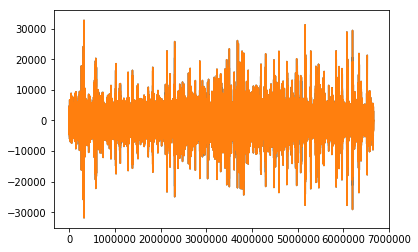

In [14]:
# Is this stereo recording useful?

plt.plot(data)
plt.show()

In [15]:
data[:,0][200000:200100]

array([-1276, -1813, -2581, -2862, -2677, -2004, -1890, -2836, -3270,
       -2882, -2558, -1736,  -712,  -547,  -368,  -104,  -718,  -823,
         212,   633,   506,   950,  1695,  2366,  2503,  1949,  1297,
         412,  -334,   -66,   218,    71,   334,   371,    61,   303,
         618,   584,   -88, -1486, -1716,  -665,  -389,   -91,   655,
          11,  -974,  -559,   368,  1062,   974,   203,   286,   601,
        -199,  -624,    53,   734,  1217,  1208,   703,   924,  1660,
        1728,  1410,   905,  -181, -1042,  -999, -1045, -1621, -1694,
       -1192, -1022,  -873,  -372,  -505, -1250, -1155,  -437,  -405,
        -695,  -688,  -720,  -514,  -140,  -463,  -896,  -797,  -838,
        -691,  -205,  -380,  -606,  -210,    28,   381,   806,   418,
         -13], dtype=int16)

In [16]:
data[:,1][200000:200100]

array([-1277, -1812, -2581, -2862, -2677, -2004, -1890, -2836, -3270,
       -2883, -2558, -1737,  -712,  -546,  -367,  -103,  -718,  -824,
         211,   632,   506,   950,  1696,  2366,  2503,  1950,  1297,
         412,  -334,   -67,   218,    71,   335,   370,    61,   303,
         617,   584,   -87, -1485, -1716,  -665,  -389,   -91,   655,
          10,  -975,  -558,   369,  1061,   974,   204,   287,   600,
        -198,  -624,    52,   734,  1216,  1208,   703,   925,  1660,
        1728,  1409,   905,  -181, -1042,  -999, -1045, -1622, -1693,
       -1192, -1022,  -873,  -371,  -505, -1251, -1155,  -437,  -405,
        -695,  -689,  -719,  -514,  -140,  -463,  -896,  -798,  -838,
        -691,  -204,  -381,  -606,  -209,    28,   381,   807,   418,
         -14], dtype=int16)

In [17]:
# FIX ME: what are min and max

diff = data[:,0] - data[:,1]
diff[200000:200100]

array([ 1, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0, -1, -1, -1,  0,
        1,  1,  1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  1,  0,  0, -1,  1,
        0,  0,  1,  0, -1, -1,  0,  0,  0,  0,  0,  1,  1, -1, -1,  1,  0,
       -1, -1,  1, -1,  0,  1,  0,  1,  0,  0, -1,  0,  0,  1,  0,  0,  0,
        0,  0,  1, -1,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  1, -1,  0,
        0,  0,  0,  1,  0,  0, -1,  1,  0, -1,  0,  0, -1,  0,  1],
      dtype=int16)

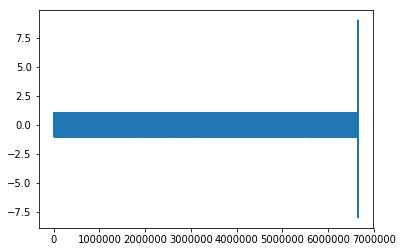

In [18]:
import numpy as np

plt.plot(diff)
plt.show()

/home/clemens/.local/share/virtualenvs/PyDeepSqueak-H37vP6Qb/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


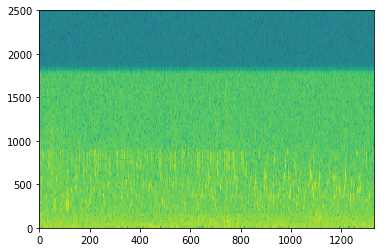

In [19]:
### https://shallowsky.com/blog/programming/sonograms-in-python.html
# https://matplotlib.org/examples/pylab_examples/specgram_demo.html

Pxx, freqs, bins, im = plt.specgram(data[:,0], Fs=5000)#, NFFT=1024, noverlap=900)
plt.show()

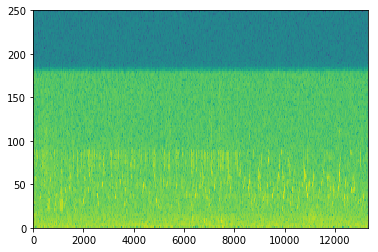

In [20]:
Pxx, freqs, bins, im = plt.specgram(data[:,1], Fs=500)#, NFFT=1024, noverlap=900)
plt.show()

In [21]:
from scipy import signal
from scipy.io import wavfile
import scipy.io.wavfile

M = 1024

freqs, times, spect = signal.spectrogram(data[:,0], fs=fs, window='hanning',
                                  nperseg=1024, noverlap=M - 100,
                                  detrend=False, scaling='spectrum')

In [22]:
freqs.size

513

In [26]:
freqs[0:20]

array([  0.        ,  43.06640625,  86.1328125 , 129.19921875,
       172.265625  , 215.33203125, 258.3984375 , 301.46484375,
       344.53125   , 387.59765625, 430.6640625 , 473.73046875,
       516.796875  , 559.86328125, 602.9296875 , 645.99609375,
       689.0625    , 732.12890625, 775.1953125 , 818.26171875])

In [24]:
times.size

66587

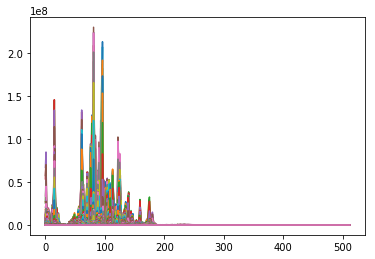

In [25]:
plt.plot(spect)
plt.show()